In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sns.set()
%matplotlib inline

class kNearestNeighbors():
    
    def __init__(self, k):
        self.k = k
        
    def euclidean_distance(self, a, b):
        """
        Calculate the euclidean distance.

        Parameters
        ----------
        a: 2d array
           Array which holds the data points.
        b: 2d array
            Array which holds the data point on which 
            we want to calculate the distance.

        Returns
        -------
        Result : float 
                 The euclidean distance between the points. 

        Example
        -------
        The first array is in the form :  a = [[1, 2], [3, 4]]
        The second :                      b = [[5, 6]]]
        So, we calculate the distance like : sqrt( (1 - 5)**2 + (3 - 5)** 2 + (2 - 6)**2 + (4 - 6)**2 )
        """
        return np.asscalar(np.sqrt(np.sum((a - b)**2)))

    def train(self, X, y):
        """
        Train network.

        Parameters
        ----------
        k : int
            The number of neighbors.
        X: 2d array
           The train data points without labels.
        y: 1d array
           The train labels.

        Returns
        -------
        None
        """
        k = self.k                
        if k > len(X):
            raise ValueError('Number of neighbors can\'t be greater than the length of data array.')
        if k == 0:
            raise ValueError('k must be at least one!')
        self.X = X
        self.y = y
        
        
    def predict(self, X_test):
        """
        Predict in which class (label) a new point belongs to.
        
        Parameters
        ----------
        X_test : 1d array
                 The array which contains the new point.
        
        Returns
        -------
        A 2d array which contains the nearest points.
        most_common_label : string
                            The most common label.
        farthermost : float
                      The farhermost distance.
        """
        distance = []
        # Calculate the distance between each pair of points in the 
        # train data and the test data.
        for idx, x in enumerate(self.X):
            distance.append(self.euclidean_distance(x, X_test))
        # Append the labels to the distances.    
        distance = np.append(distance, self.y)
        # Create the pairs points-labels
        distances_with_labels = []
        # Right now the data (distance) is like : [0.1, 0.2, 'A', 'B']
        # assuming that the length of self.X is 2 ([0.1, 0.2])
        # We want to be able to make the pair : [0.1, 'A'], [0.2, 'B']
        # To do so, we want the element with index 0 paired with the element with index 2.
        # Then, the element with index 1 with the element with index 3 and so on.
        # SO, we are jumping by the length of self.X.
        [distances_with_labels.append([distance[idx], distance[idx + len(self.X)]]) for idx,_ in enumerate(self.X)]
        # Sort the distances according to ascending order.
        # We use x[0] beacause we want to sort according to distance item.
        distances_with_labels_sorted = sorted(distances_with_labels, key=lambda x: x[0])
        # Find the closest points and their labels (labels contains both the 
        # distance values and the class names).
        labels = distances_with_labels_sorted[:self.k]
        # Count the labels (that's why we use item[1])
        labels = Counter(item[1] for item in labels)
        # Find the most common label (label with the most occurences)
        most_common_label = labels.most_common(1)[0][0]
        # Find the farthermost point (the last label) in order to 
        # use it for the radius of the circle.
        farthermost = distances_with_labels_sorted[self.k - 1]
        # Get the location (indices) of the original array
        # (it implements a sort at the same time).
        distances_with_labels = np.array(distances_with_labels)
        location = np.argsort(distances_with_labels[:, 0])
        return self.X[location[:self.k]], most_common_label, float(farthermost[0])
    
    def accuracy(self, observed, expected):
        """
        Estimates the accuracy between the observer and
        expected data.
        
        Parameters
        ----------
        observed : array
                   The observed data.
        expected : array
                   The expected (predicted) data.
                   
        Returns
        -------
        float
        The percent of accuracy. 
        """
        count = 0
        for idx, x in enumerate(observed):
            if observed[idx] == expected[idx]:
                count +=1
        return (count / float(len(observed))) * 100

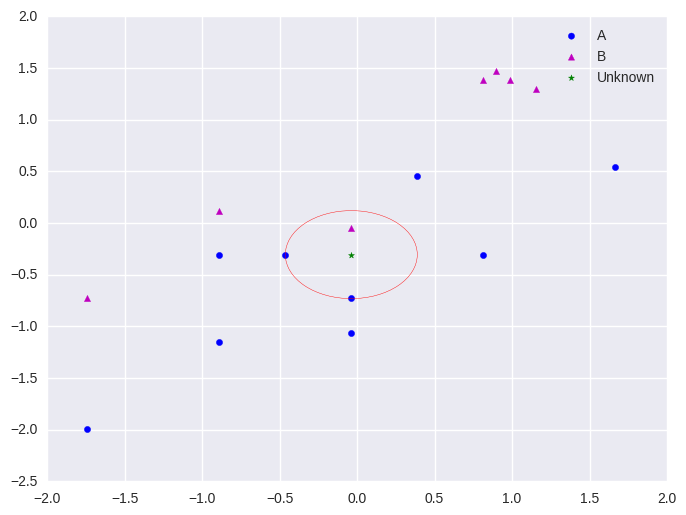


Nearest points: 
[[-0.037243   -0.05284869]
 [-0.037243   -0.72931192]
 [-0.46287729 -0.3065224 ]] 	 
Label: A


Accuracy : 100.0


In [78]:
X_train = np.array([[-1., -1.], [0., 1.], [0., 0.], [-1., 0.5], [2., 3.], [0.5, 1.], [1., 0.5],
                   [1.5, 1.9], [0., 1.5], [1., 1.3], [1., 0.1], [2., 1], [3., 2.], [2.2, 3.], 
                   [2.4, 2.9], [2.1, 3.1]])

y_train = np.array(['A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B' ])

X_test = np.array([[1., 1.]])
y_test = np.array(['A'])

# Standardize features so they have the properties of standar normal distribution (mean = 0, std = 1)
# (generally, it is used if we have to compare features that have different units)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

knn = kNearestNeighbors(3)
knn.train(X_train, y_train)
nearest_points, label, farthermost = knn.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 6))
# Plot data which are labelled as 'A'
class_A = X_train[y_train == 'A']
ax.scatter(class_A[:, 0], class_A[:, 1], color='b', marker='o', label='A')
# Plot data which are labelled as 'B'
class_B = X_train[y_train == 'B']
ax.scatter(class_B[:, 0], class_B[:, 1], color='m', marker='^', label='B')

ax.scatter(X_test[:, 0], X_test[:, 1], color='g', marker='*', label='Unknown')
circle = plt.Circle((X_test[0][0], X_test[0][1]), color='r', radius=farthermost, fill=False)
ax.add_patch(circle)
ax.legend(loc='best')
plt.show()      
print('\nNearest points: \n{0} \t \nLabel: {1}\n'.format(nearest_points, label))
print('\nAccuracy : {0}'.format(knn.accuracy(y_test, label)))
